In [1]:
import boto3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, classification_report, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.impute import SimpleImputer, KNNImputer


##defining the bucket
s3 = boto3.resource('s3')
bucket_name = 'rachaeld-data445'
bucket = s3.Bucket(bucket_name)

#defining the csv file
file_key = 'train_data.csv'

bucket_object = bucket.Object(file_key)
file_object = bucket_object.get()
file_content_stream = file_object.get('Body')

train_data = pd.read_csv(file_content_stream)
train_data.head()


,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
0,0,A,80.10,material_7,material_8,9,5,7,8,4,...,10.672,15.859,17.594,15.193,15.029,NaN,13.034,14.684,764.100,0
1,1,A,84.89,material_7,material_8,9,5,14,3,3,...,12.448,17.947,17.915,11.755,14.732,15.425,14.395,15.631,682.057,0
2,2,A,82.43,material_7,material_8,9,5,12,1,5,...,12.715,15.607,NaN,13.798,16.711,18.631,14.094,17.946,663.376,0
3,3,A,101.07,material_7,material_8,9,5,13,2,6,...,12.471,16.346,18.377,10.020,15.250,15.562,16.154,17.172,826.282,0
4,4,A,188.06,material_7,material_8,9,5,9,2,8,...,10.337,17.082,19.932,12.428,16.182,12.760,13.153,16.412,579.885,0


In [3]:
##(5 points) Report the number of observations For each product code.
train_data['product_code'].value_counts()

C    5765
E    5343
B    5250
D    5112
A    5100
Name: product_code, dtype: int64

/tmp/ipykernel_28312/383972452.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  product_groups= train_data.groupby('product_code').mean()


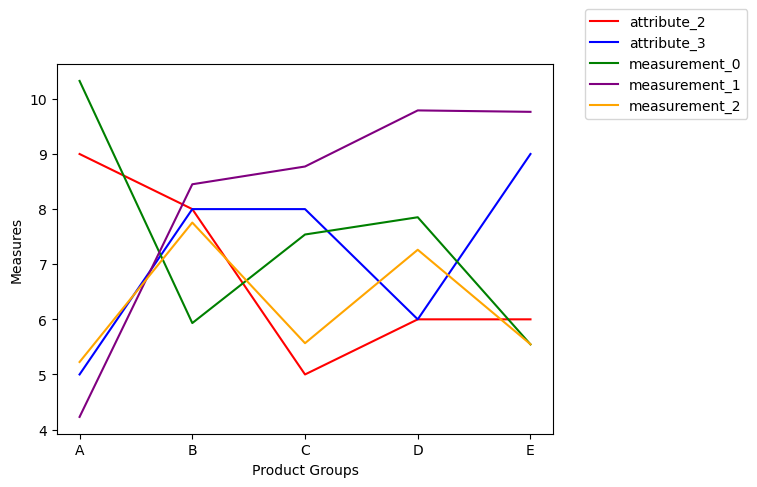

In [11]:
##(15 points) Create two visualizations that may show interesting relationships between the input
##variables and the target variable. Make sure to describe the visualizations.
product_groups= train_data.groupby('product_code').mean()
plt.plot(product_groups.index, product_groups['attribute_2'], color = 'red')
plt.plot(product_groups.index, product_groups['attribute_3'], color = 'blue')
plt.plot(product_groups.index, product_groups['measurement_0'], color = 'green')
plt.plot(product_groups.index, product_groups['measurement_1'], color = 'purple')
plt.plot(product_groups.index, product_groups['measurement_2'], color = 'orange')
plt.legend(labels = ['attribute_2', 'attribute_3','measurement_0', 'measurement_1', 'measurement_2'], bbox_to_anchor=(1.05, 1.0), loc = 'center left' )
plt.xlabel('Product Groups')
plt.ylabel('Measures')
plt.show()


<AxesSubplot: xlabel='measurement_2', ylabel='Count'>

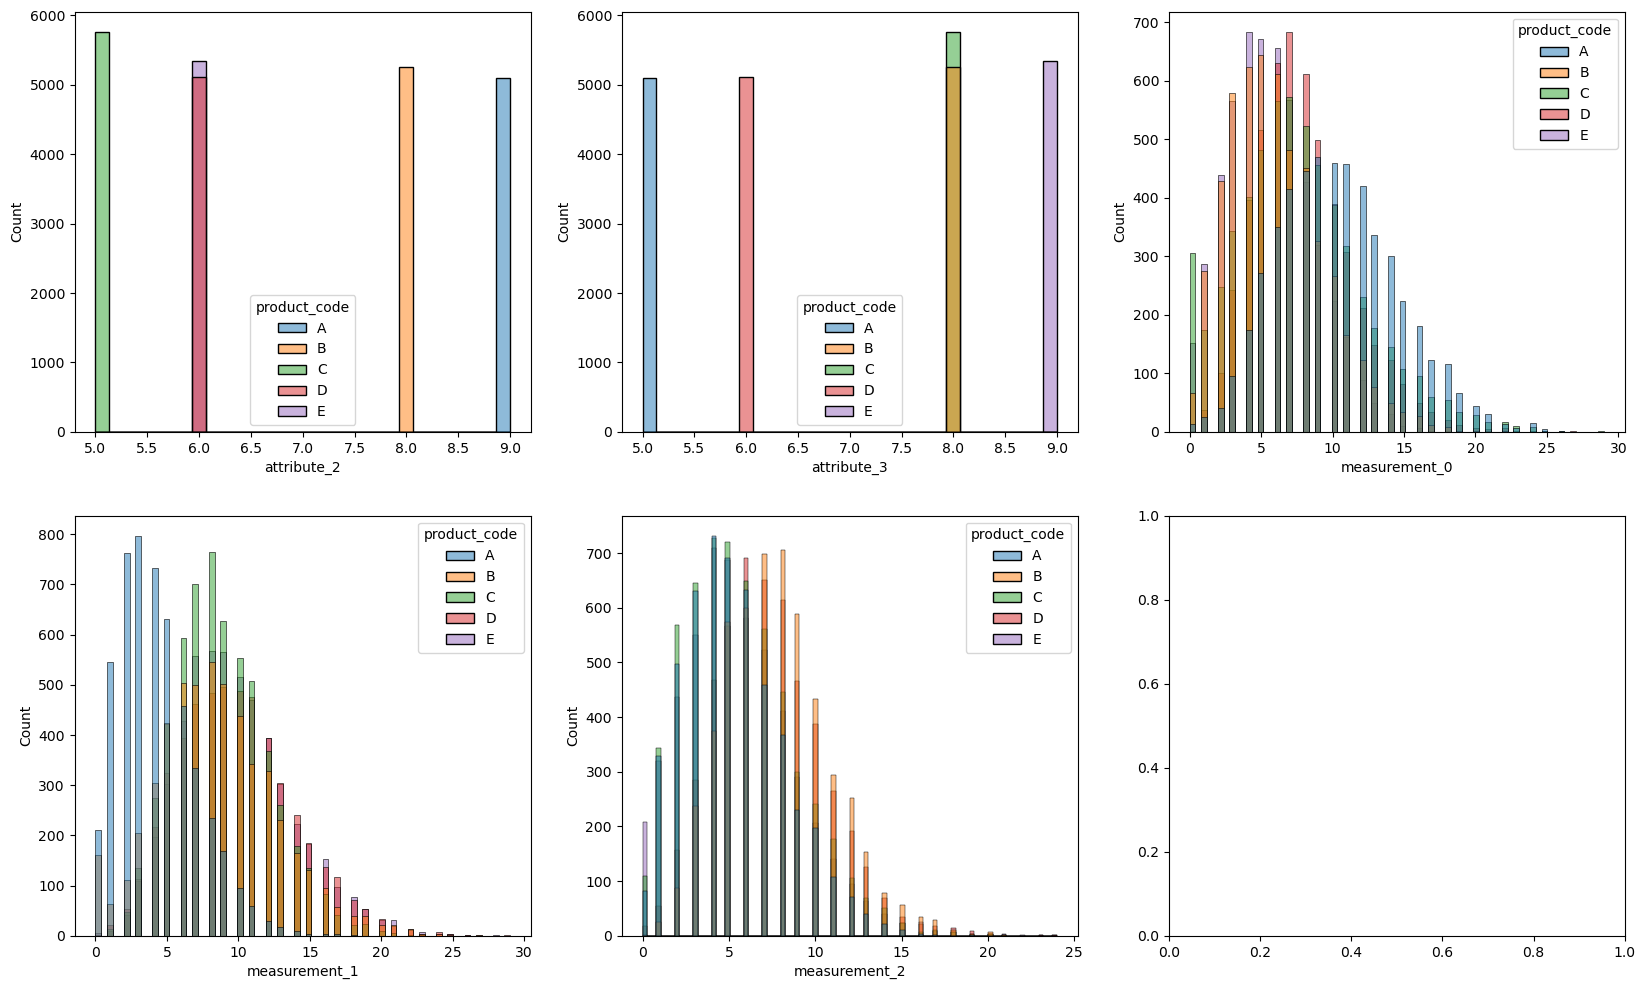

In [12]:
### MAKING ANOTHER VISUAL
import seaborn as sns

fig, axes = plt.subplots(2, 3, figsize = (20, 12))

sns.histplot(ax = axes[0, 0], x = 'attribute_2', hue = 'product_code', fill = True, data = train_data)
sns.histplot(ax = axes[0, 1], x = 'attribute_3', hue = 'product_code', fill = True, data = train_data)
sns.histplot(ax = axes[0, 2], x = 'measurement_0', hue = 'product_code', fill = True, data = train_data)
sns.histplot(ax = axes[1, 0], x = 'measurement_1', hue = 'product_code', fill = True, data = train_data)
sns.histplot(ax = axes[1, 1], x = 'measurement_2', hue = 'product_code', fill = True, data = train_data)


In [13]:
## defining inputs and target
X = train_data.drop(columns = ['failure'], axis = 1)
Y = train_data['failure']

#splitting the data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .2, stratify = Y)